In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [6]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.model import Model
from gallifrey.particles import rotated_dataset

from yt_maps import plot_planet_maps, planet_figure_name_formatting

## DATA SETUP

In [7]:
snapshot = 127
resolution = 8192
sim_id = "37_11"
num_embryos = 50
host_star_masses = (0.1, 0.3, 0.5, 0.7, 1)
# host_star_masses = 1
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
    "D-Burner",
]

In [8]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo


      DETECTED LOCAL MACHINE: Test snapshot loaded.


      CONFIG: Setting resolution to 4096.


      CONFIG: Setting snapshot to 127.


      CONFIG: Setting sim_id to 09_18.

yt : [INFO     ] 2023-10-17 15:10:36,468 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-10-17 15:10:36,522 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-10-17 15:10:36,522 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-17 15:10:36,523 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-17 15:10:36,523 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-10-17 15:10:36,523 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-17 15:10:36,524 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-10-17 15:10:36,524 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-10-17 15:10:36,524 Parameters: omega_matter 

## PLOT SETUP

In [9]:
figure_subdirectory = (
    f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Planet_maps"
)
save = True

## CREATE DATA SOURCE

In [10]:
radius = 80  # can contain a cube of 80/sqrt(3) = 46 kpc, so plots with a smaller width will have no edge effects
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [11]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        *[("stars", f"{category}") for category in planet_categories],
    ],
    bounding_box=[[-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]]
    * 3,
)

yt : [INFO     ] 2023-10-17 15:11:03,480 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-10-17 15:11:03,481 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-17 15:11:03,481 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-10-17 15:11:03,482 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2023-10-17 15:11:03,482 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-10-17 15:11:03,483 Allocating for 3.508e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-10-17 15:11:03,811 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:03,812 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:03,813 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:03,813 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:03,817 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:04,306 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:04,489 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:04,673 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:04,857 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:05,046 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'


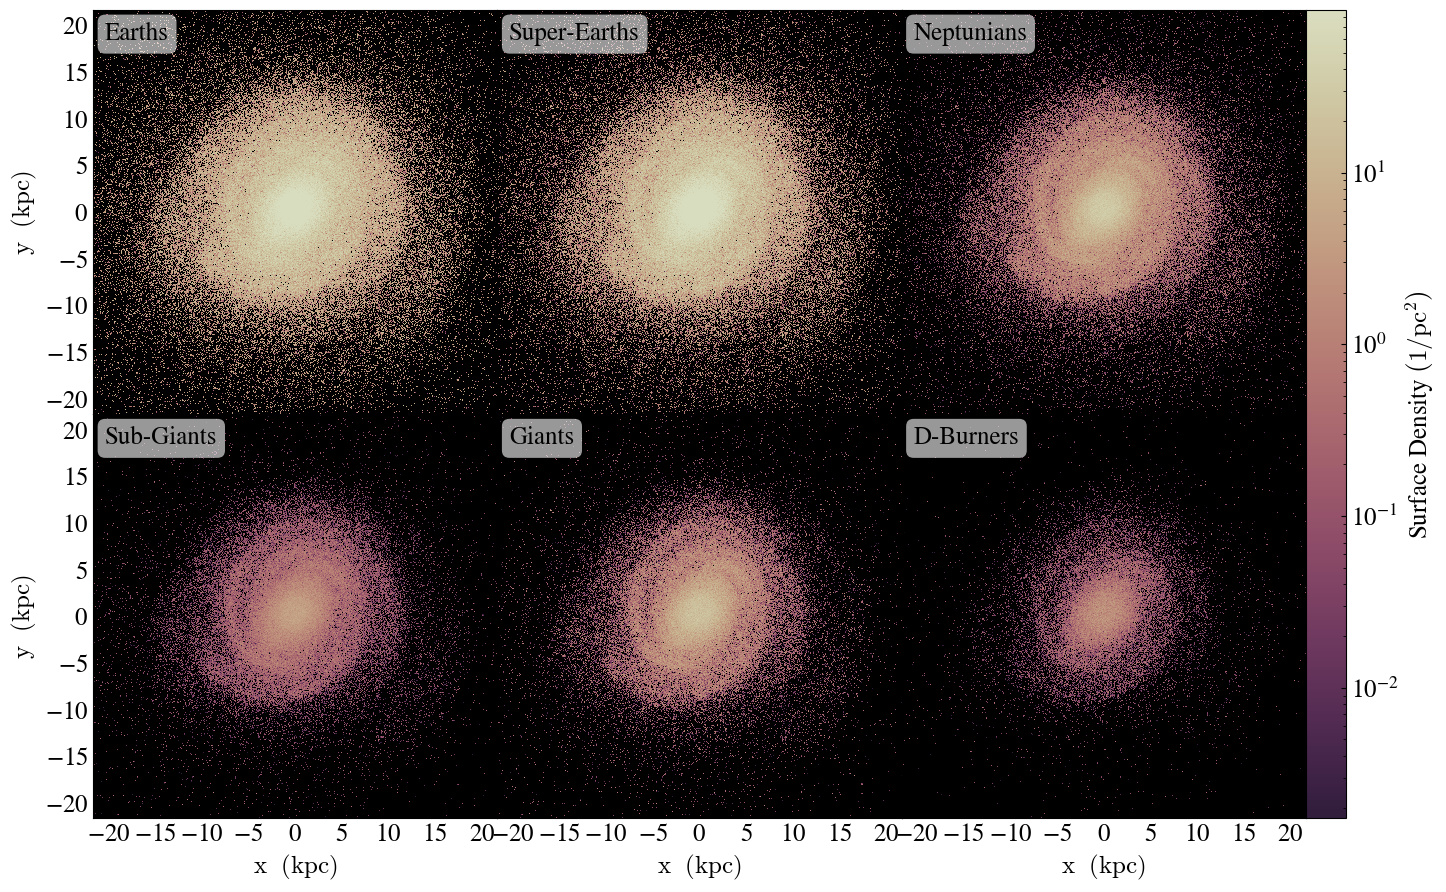

In [12]:
zplot, zfig = plot_planet_maps(
    planet_categories,
    rotated_sphere_data,
    normal="z",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)

## SIDE-ON MAPS

yt : [INFO     ] 2023-10-17 15:11:35,807 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:35,808 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:35,809 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:35,810 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:11:35,810 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:36,018 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:36,198 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:36,365 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:36,544 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:11:36,717 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'


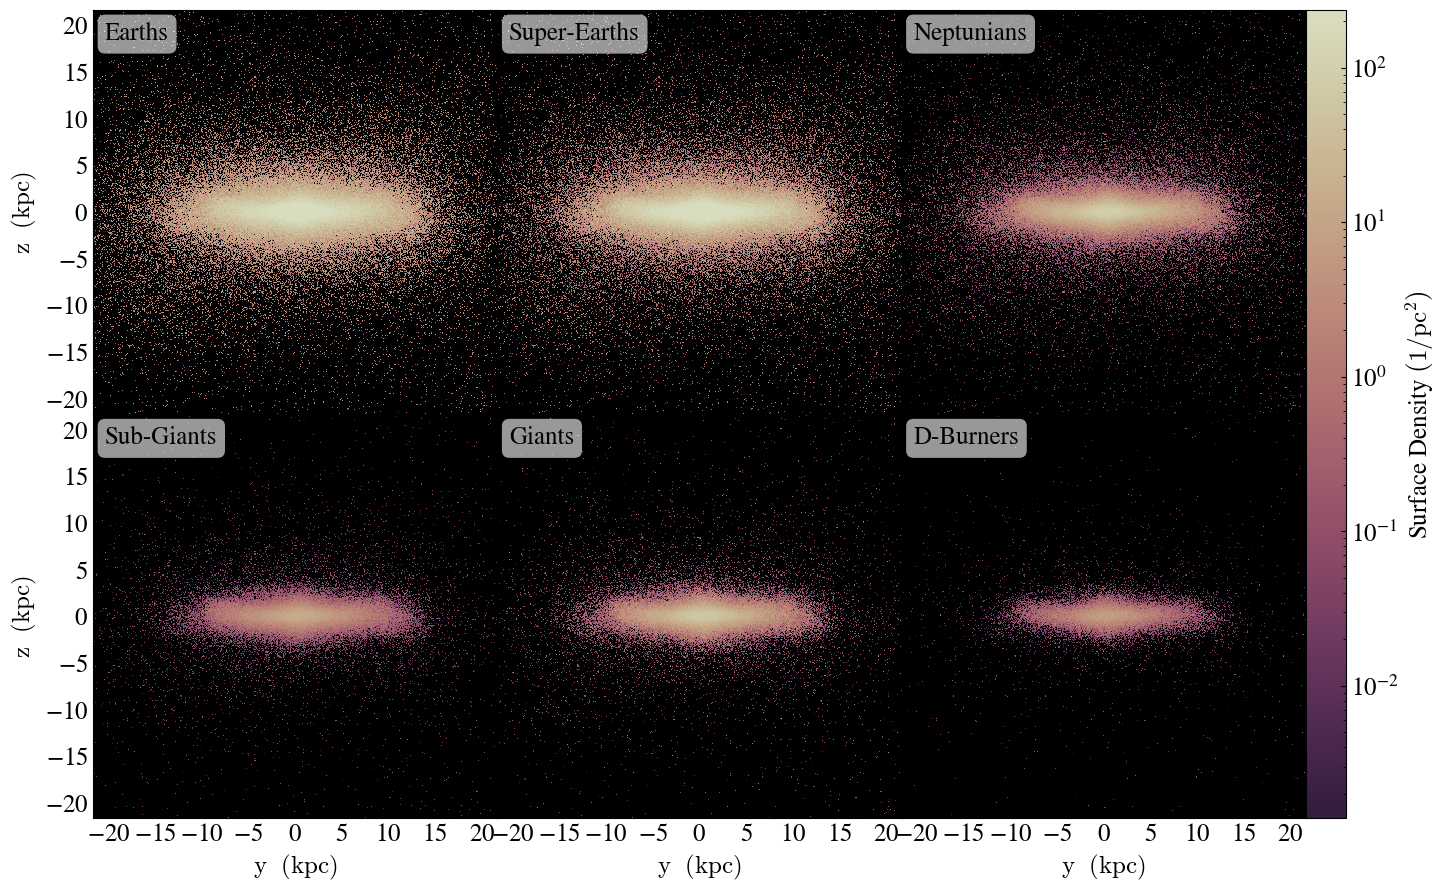

In [13]:
zplot, zfig = plot_planet_maps(
    planet_categories,
    rotated_sphere_data,
    normal="x",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)